# Modelo con Random Forest [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mariaprojas/AI-Project/blob/master/05%20-%20modelo%20con%20Random%20Forest.ipynb)


### Importando las librerias necesarias

In [ ]:
#Importando librerias
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
!pip install mlutils
import mlutils
%matplotlib inline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for mlutils: filename=mlutils-0.2.0b0-py3-none-any.whl size=12060 sha256=9bb029dbb7085c50b815fcddfd7834551e2135c9ef2c4323cc7a958c9dab0383
  Stored in directory: /root/.cache/pip/wheels/b4/a2/ee/e67a5e7ac520e31532ded497a13bd9961174ea761ec8a299dc
Successfully built mlutils


### Importando el archivo del dataset desde Google Drive

In [ ]:
!pip install gdown

import gdown

# Define ID 
archivo_id = "1-3UeC8FgrTSzs25JVH2WFAq-TA5Tg2IC"

# Asigna nombre para el archivo en Colab
d1 = "dataset_2.zip"

# Construye el enlace de descarga del archivo
enlace_descarga = "https://drive.google.com/uc?id=" + archivo_id

# Descarga el archivo desde el enlace de descarga y lo guarda en Colab
gdown.download(enlace_descarga, d1, quiet=False)

!unzip -q dataset_2.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Downloading...
From: https://drive.google.com/uc?id=1-3UeC8FgrTSzs25JVH2WFAq-TA5Tg2IC
To: /content/dataset_2.zip
100%|██████████| 38.6M/38.6M [00:00<00:00, 99.6MB/s]


In [ ]:
import pickle
ruta_pickle = 'data.pickle'  # Ruta al archivo data.pickle
with open(ruta_pickle, 'rb') as file:
    data = pickle.load(file)
d = pd.DataFrame(data)


##Random Forest

Split

In [ ]:
X = d.drop('HasDetections', axis=1) 
y = d['HasDetections'].astype(int)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

###Busqueda de mejores hiperparametros

Con el fin de encontrar los parametros que se acomodan a mejor a nuestros datos implementamos una búsqueda de hiperparámetros con validación cruzada,  su ejecucion requiere aproximadamente una hora.

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

dh= d.copy().head(100000)
# Dividir los datos en características (X) y variable objetivo (y)
Xh = dh.drop('HasDetections', axis=1) 
yh = dh['HasDetections'].astype(int)

# Dividir los datos en conjuntos de entrenamiento y prueba
Xh_train, Xh_test, yh_train, yh_test = train_test_split(Xh, yh, test_size=0.3, random_state=42)

# Definir los parámetros a probar en la búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 30, 50],
}

# Crear el estimador RandomForestClassifier
estimador = RandomForestClassifier()
yh_train=yh_train.astype(int)
# Realizar la búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(estimador, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(Xh_train, yh_train)

# Obtener los mejores parámetros y el modelo con los mejores parámetros
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba con el mejor modelo
yh_pred_proba = best_model.predict_proba(Xh_test)[:, 1]  # Probabilities of the positive class
auc_roc = roc_auc_score(yh_test, yh_pred_proba)

# Imprimir los mejores parámetros y el área bajo la curva ROC
print("Mejores parámetros:", best_params)
print("AUC-ROC:", auc_roc)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

Mejores parámetros: {'max_depth': 30, 'n_estimators': 100}
AUC-ROC: 0.6745919859723506


###Entrenamiento y score

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

# Crear el estimador RandomForestClassifier
estimador = RandomForestClassifier(n_estimators=100, max_depth=30)

# Entrenar el modelo con el conjunto de entrenamiento
estimador.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = estimador.predict(X_test)
auc_roc = roc_auc_score(y_test, y_pred)

# Imprimir los mejores parámetros y el área bajo la curva ROC

print("AUC-ROC:", auc_roc)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


AUC-ROC: 0.6201568723115852


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


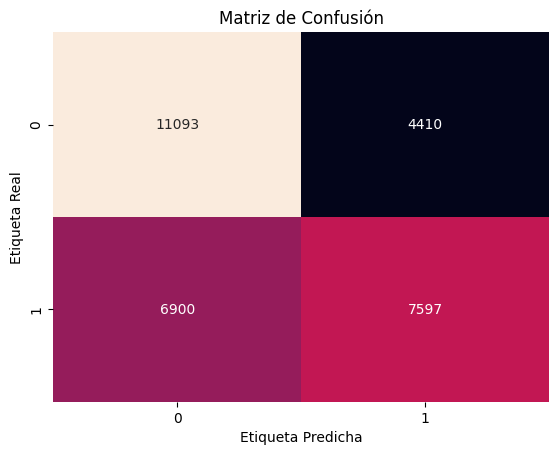

In [ ]:
# Definir un umbral para separar las clases
umbral = 0.5
from sklearn.metrics import confusion_matrix
# Convertir valores continuos a clases basadas en el umbral
y_train_clase = (y_train >= umbral).astype(int)
y_test_clase = (y_test >= umbral).astype(int)

# Ajustar el clasificador con los datos de entrenamiento
estimador.fit(X_train, y_train_clase)

# Realizar predicciones en los datos de prueba
y_pred_clase = estimador.predict(X_test)
y_test_clase=y_test_clase.astype(int)
y_pred_clase=y_pred_clase.astype(int)
# Crear una matriz de confusión
cm = confusion_matrix(y_test_clase, y_pred_clase)

# Mostrar la matriz de confusión
sns.heatmap(cm, annot=True, cbar=False, fmt="d")
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.title('Matriz de Confusión')
plt.show()


###Metrica

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


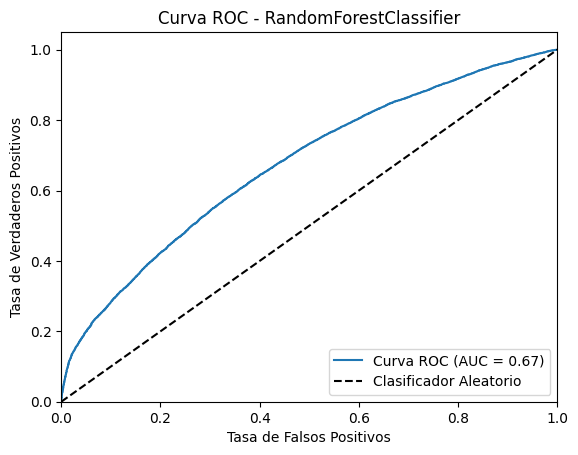

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Obtener las probabilidades de la clase positiva para los datos de prueba
y_prob = estimador.predict_proba(X_test)[:, 1]

# Calcular la tasa de verdaderos positivos y la tasa de falsos positivos
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcular el área bajo la curva ROC
roc_auc = roc_auc_score(y_test, y_prob)

# Trazar la curva ROC
plt.plot(fpr, tpr, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Clasificador Aleatorio')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - RandomForestClassifier')
plt.legend(loc="lower right")
plt.show()

###Curva de aprendizaje

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

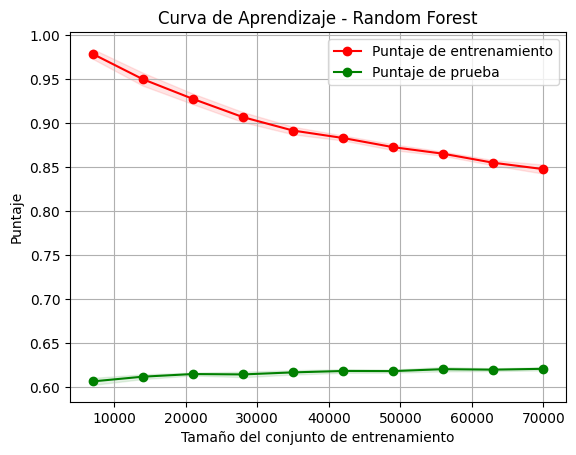

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import auc, roc_curve
from sklearn.model_selection import learning_curve

cv = ShuffleSplit(n_splits=10, test_size=.3)
# Calcular la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(estimador, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=cv)

# Calcular las medias y desviaciones estándar de los puntajes
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure()
plt.title("Curva de Aprendizaje - Random Forest")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Puntaje")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Puntaje de entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Puntaje de prueba")

plt.legend(loc="best")
plt.show()

##RandomForest con PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer

###Busqueda de mejores hiperparametros

In [ ]:
pipe = Pipeline([
    ('pca', PCA()),
    ('rf', RandomForestClassifier())
])

# Definir los parámetros a ajustar
param_grid = {
    'pca__n_components': [2, 3, 4],  # prueba diferentes números de componentes principales
    'rf__n_estimators': [50, 100, 200],  # prueba diferentes números de estimadores en Random Forest
    'rf__max_depth': [None, 5, 10],  # prueba diferentes profundidades máximas en Random Forest
}

# Definir el scorer utilizando el área bajo la curva ROC
scorer = make_scorer(roc_auc_score, greater_is_better=True, needs_proba=True)

# Realizar la búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring=scorer)
grid_search.fit(X, y)

# Imprimir los mejores parámetros encontrados y el mejor rendimiento
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor rendimiento (área bajo la curva ROC):", grid_search.best_score_)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

Mejores parámetros: {'pca__n_components': 4, 'rf__max_depth': 10, 'rf__n_estimators': 200}
Mejor rendimiento (área bajo la curva ROC): 0.6083891760070733


###Entrenamiento y score

In [ ]:
pipe = Pipeline([
    ('pca', PCA(n_components=2)),
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=10))
])

# Ajustar el pipeline al conjunto de entrenamiento
pipe.fit(X_train, y_train)

# Predecir las etiquetas para el conjunto de prueba
y_pred = pipe.predict(X_test)
auc_roc = roc_auc_score(y_test, y_pred)
print("AUC-ROC:", auc_roc)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


AUC-ROC: 0.5357134058359874


###Metrica

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Área bajo la curva ROC: 0.5267173296775518


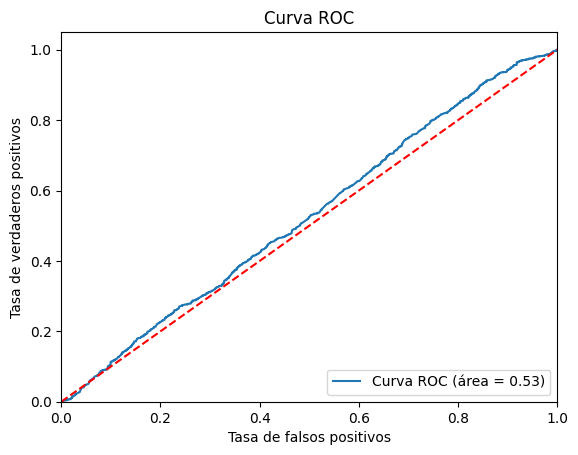

In [ ]:
# Obtener las probabilidades de predicción para el conjunto de prueba
y_prob = pipe.predict_proba(X_test)

# Calcular la tasa de falsos positivos, la tasa de verdaderos positivos y los umbrales de la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])

# Calcular el área bajo la curva ROC
auc = roc_auc_score(y_test, y_prob[:, 1])
print("Área bajo la curva ROC:", auc)

# Trazar la curva ROC
plt.figure()
plt.plot(fpr, tpr, label='Curva ROC (área = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

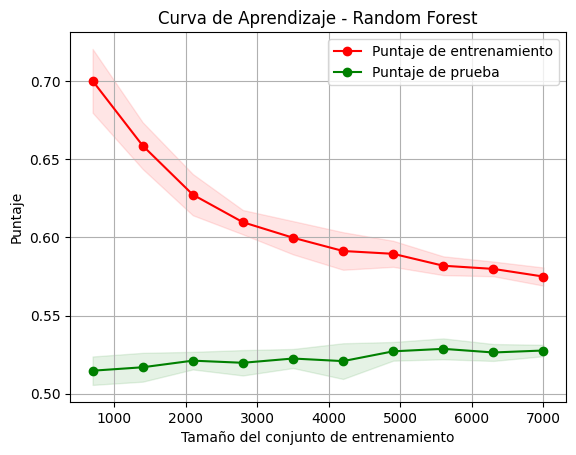

In [ ]:
# Calcular la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(pipe, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=cv)

# Calcular las medias y desviaciones estándar de los puntajes
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure()
plt.title("Curva de Aprendizaje - Random Forest")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Puntaje")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Puntaje de entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Puntaje de prueba")

plt.legend(loc="best")
plt.show()